In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Ecuaciones Diferenciales

$$\frac{dN_A}{dt} = -\lambda_A N_A$$
$$\frac{dN_B}{dt} = \lambda_A N_A - -\lambda_B N_B$$
$$\frac{dN_C}{dt} = \lambda_B N_B$$

In [13]:
def System(r,t, LA, LB):
    
    NA, NB, NC = r
    dNadt = -LA*NA
    
    dNbdt = LA*NA-LB*NB
    dNcdt = LB*NB
    
    
    
    
    return np.array([dNadt,dNbdt, dNcdt])

In [14]:
t = np.linspace(0,10,50)
r0 = np.array([500.,0., 0.])
sol = odeint(System, r0, t, args=(0.5,0.3))

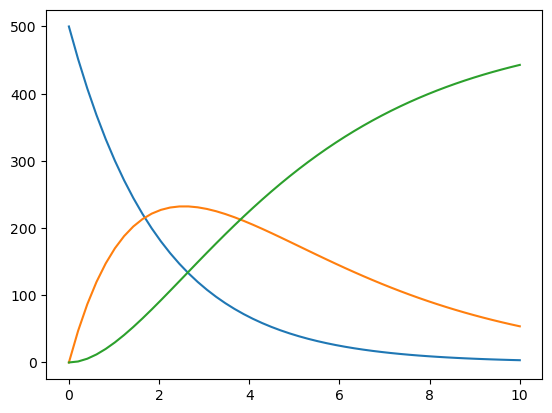

In [15]:
plt.plot(t, sol[:,0])
plt.plot(t,sol[:,1])
plt.plot(t,sol[:,2])

In [16]:
def Increment(f,r,t,h, LA=0.5, LB=0.3):
    
    state1 = np.array([r[0],r[1], r[2]])
    K1 = f(state1,t, LA, LB)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],  r[2]+0.5*h*K1[1]])
    K2 = f(state2,t+0.5*h, LA, LB)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1], r[2]+0.5*h*K2[1]])
    K3 = f(state3,t+0.5*h, LA, LB)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1], r[2]+h*K3[1]])
    K4 = f(state4, t+h, LA, LB)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [47]:
def Adaptativo(f,r0,t,e=1e-3):
    
    h = t[1] - t[0]
    tf = t[-1]
    t = t[0]
    r = r0
    
    TimeVector=np.array([t])
    Vector = r
    while t < tf:
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)
        rt = Increment(f,r,t,2*h)
        error = np.linalg.norm( r2 - rt )
        if error < e:
            t += 2*h
            r = rt
            TimeVector = np.append(TimeVector, t)
            Vector = np.vstack((Vector, r))
        elif error  > e:
            q = 0.85* (e/error)**(0.25)

            h = h*q
            
    
                

    return TimeVector, Vector





In [49]:
solution = Adaptativo(System,r0,t)
solution

(array([ 0.        ,  0.24842712,  0.49685423,  0.74528135,  0.99370846,
         1.24213558,  1.49056269,  1.73898981,  1.98741692,  2.23584404,
         2.48427115,  2.73269827,  2.98112538,  3.2295525 ,  3.47797962,
         3.72640673,  3.97483385,  4.22326096,  4.47168808,  4.72011519,
         4.96854231,  5.21696942,  5.46539654,  5.71382365,  5.96225077,
         6.21067789,  6.459105  ,  6.70753212,  6.95595923,  7.20438635,
         7.45281346,  7.70124058,  7.94966769,  8.19809481,  8.44652192,
         8.69494904,  8.94337615,  9.19180327,  9.44023039,  9.6886575 ,
         9.93708462, 10.18551173]),
 array([[500.        ,   0.        ,   0.        ],
        [441.59572493,  56.23741091,   2.16686416],
        [390.01356855, 101.86691807,   8.11951338],
        [344.45664907, 138.41768307,  17.12566785],
        [304.22116731, 167.21941613,  28.55941657],
        [268.68553383, 189.42716977,  41.88729639],
        [237.30076618, 206.04312913,  56.65610469],
        [209.582

In [45]:
t1 = len(solution[0])
t1

42

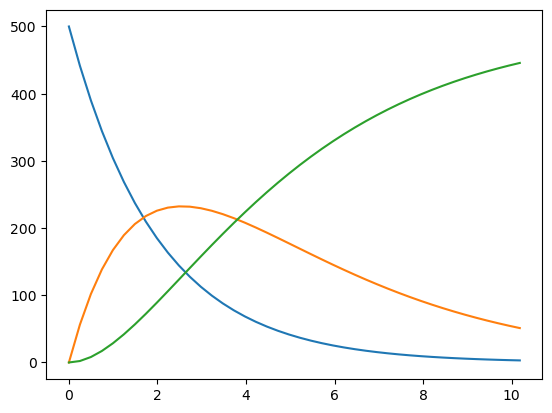

In [53]:
plt.plot(solution[0], solution[1][:,0])
plt.plot(solution[0], solution[1][:,1])
plt.plot(solution[0], solution[1][:,2])


# Diferencia

Text(0.5, 1.0, 'RK4')

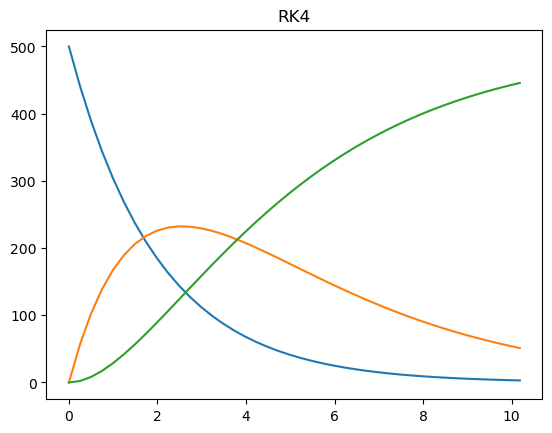

In [54]:
plt.plot(solution[0], solution[1][:,0])
plt.plot(solution[0], solution[1][:,1])
plt.plot(solution[0], solution[1][:,2])
plt.title('RK4')


Text(0.5, 1.0, 'Odeint')

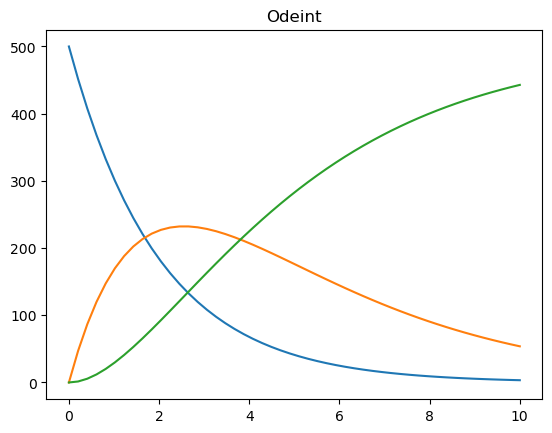

In [55]:
plt.plot(t, sol[:,0])
plt.plot(t,sol[:,1])
plt.plot(t,sol[:,2])
plt.title('Odeint')

Text(0.5, 1.0, 'Odeint y RK4 (se sobreponen)')

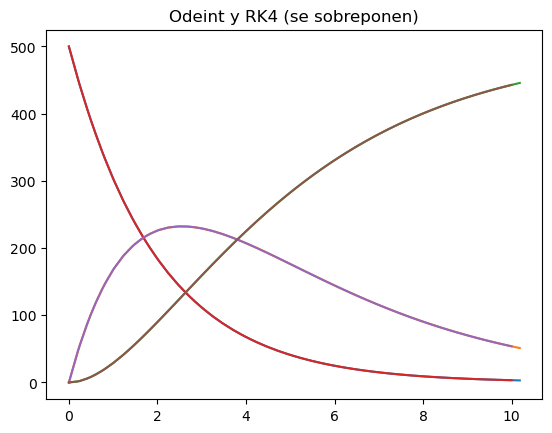

In [57]:
plt.plot(solution[0], solution[1][:,0])
plt.plot(solution[0], solution[1][:,1])
plt.plot(solution[0], solution[1][:,2])
plt.plot(t, sol[:,0])
plt.plot(t,sol[:,1])
plt.plot(t,sol[:,2])
plt.title('Odeint y RK4 (se sobreponen)')

Text(0.5, 1.0, 'RK4')

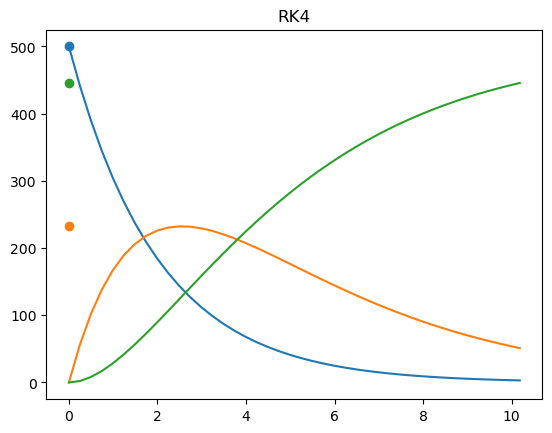

In [63]:
max1=np.max(solution[1][:,0])
max11=solution[0][np.where(np.max(solution[1][:,0]))]
max2=np.max(solution[1][:,1])
max22=solution[0][np.where(max2)]
max3=np.max(solution[1][:,2])
max33=solution[0][np.where(np.max(solution[1][:,2]))]
plt.plot(solution[0], solution[1][:,0])
plt.plot(solution[0], solution[1][:,1])
plt.plot(solution[0], solution[1][:,2])
plt.scatter(max11, max1)
plt.scatter(max22, max2)
plt.scatter(max33, max3)
plt.title('RK4')